In [6]:
import pandas as pd
import trackpal as tp

# Simple track features
## 1. Create some simulated tracks
1. Simulate tracks
 * brownian motion (pure random walk)
 * linear motion with some randomness
2. Give a tag `"label"` for later use
3. Merge the two track tables

In [7]:
trj_brownian = tp.simulate.brownian(n_tracks=10)
trj_linear   = tp.simulate.brownian_linear(n_tracks=10)

trj_brownian["label"] = 0
trj_linear["label"]   = 1

# concatenate (note: the trackids need to be relabeled) 
trj = tp.concat_relabel([trj_linear, trj_brownian])

## 2. Plot tracks

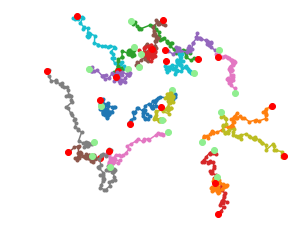

In [8]:
trj.groupby(trj.id.track).apply(tp.visu.plot_trj, coords=trj.id.xy, line_fmt=".-");

## 3. Compute simple track features
 * Confinement ratio (ratio of start/end net distance vs. total track distance)
 * Statistics of the instantaneous speed

In [9]:
# prepare feature factory
feature_factory = tp.features.Features(frame=trj.id.frame, coords=trj.id.xy)

# compute two features
conf_ratio  = feature_factory.get("confinement_ratio")
speed_stats = feature_factory.get("speed_stats")

conf_ratio_res  = trj.groupby(trj.id.track).apply(conf_ratio.compute)
speed_stats_res = trj.groupby(trj.id.track).apply(speed_stats.compute)

# retrieve labels assignment
y = trj.groupby(trj.id.track)["label"].first()

# merge into single DataFrame
features = pd.concat([conf_ratio_res, speed_stats_res, y], axis=1)

## Visualize two features as scatter plot
* Confinement ratio
* speed average 
and color code each tracks motion type

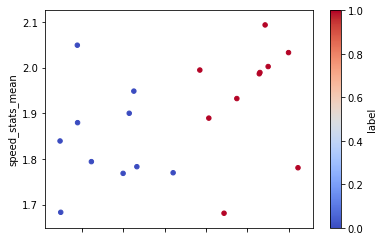

In [10]:
# plot with pandas
features.plot.scatter(x="confinement_ratio", y="speed_stats_mean", c="label", cmap="coolwarm");